In [265]:
# Pandas giúp làm việc dễ dàng và trực quan với dữ liệu có cấu trúc (dạng bảng)
import pandas as pd
# Để sử dụng thực quan hóa dữ liệu dung thư viện seaborn và matplotlib.pyplot
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.optimizers import Adam

In [266]:
weather = pd.read_csv('localweather.csv', index_col="DATE", header=0, delimiter=",", encoding="utf-8")
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2010-01-01,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",24.9,"H,,S",29.2,",,S",NaN,NaN
2010-01-02,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.5,",,S",20.7,",,S"
2010-01-03,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.5,",,S",23.1,",,S"
2010-01-04,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.7,",,S",22.6,",,S"
2010-01-05,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.5,",,S",21.6,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-16,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,NaN,NaN,27.0,"H,,S",NaN,NaN,23.0,",,S"
2025-04-17,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,NaN,NaN,27.2,"H,,S",NaN,NaN,NaN,NaN
2025-04-18,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,NaN,NaN,27.6,"H,,S",NaN,NaN,25.2,",,S"


<h1>Làm sạch dữ liệu</h1>

In [267]:
# xóa dòng dữ liệu rỗng
weather.dropna(how='all', inplace=True)

In [268]:
# xóa các dòng bị trùng
weather.drop_duplicates(inplace=True)

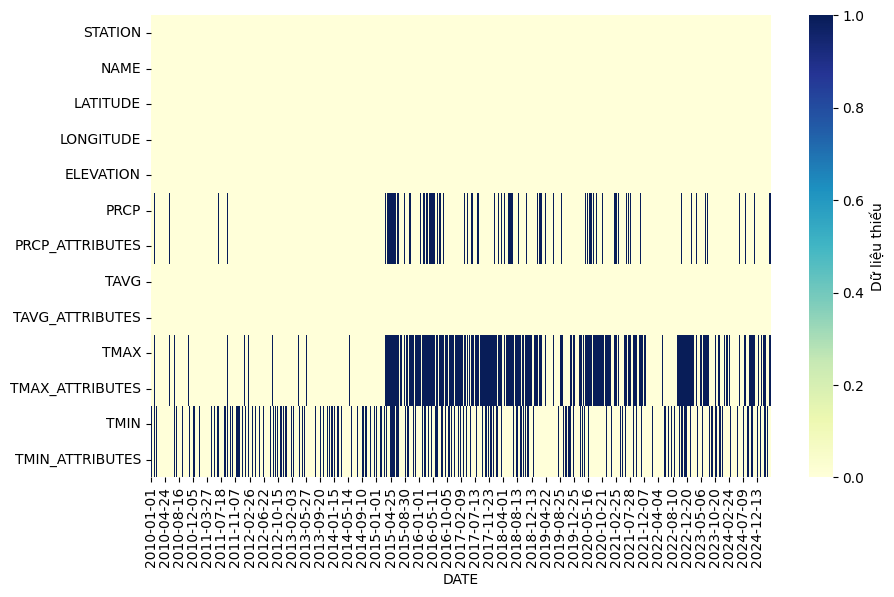

In [269]:
# dùng heatmap để trực quan hóa dữ liệu
plt.figure(figsize=(10,6))
sns.heatmap(weather.isna().transpose(), cmap='YlGnBu',
            cbar_kws={'label': 'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [270]:
weather['PRCP'].fillna(0,inplace=True)
weather['TMAX'].fillna(weather['TMAX'].median(),inplace=True)
weather['TMIN'].fillna(weather['TMIN'].median(),inplace=True)
weather['TMAX_ATTRIBUTES'].fillna(',,S',inplace=True)
weather['TMIN_ATTRIBUTES'].fillna(',,S',inplace=True)
weather['PRCP_ATTRIBUTES'].fillna(',,S',inplace=True)


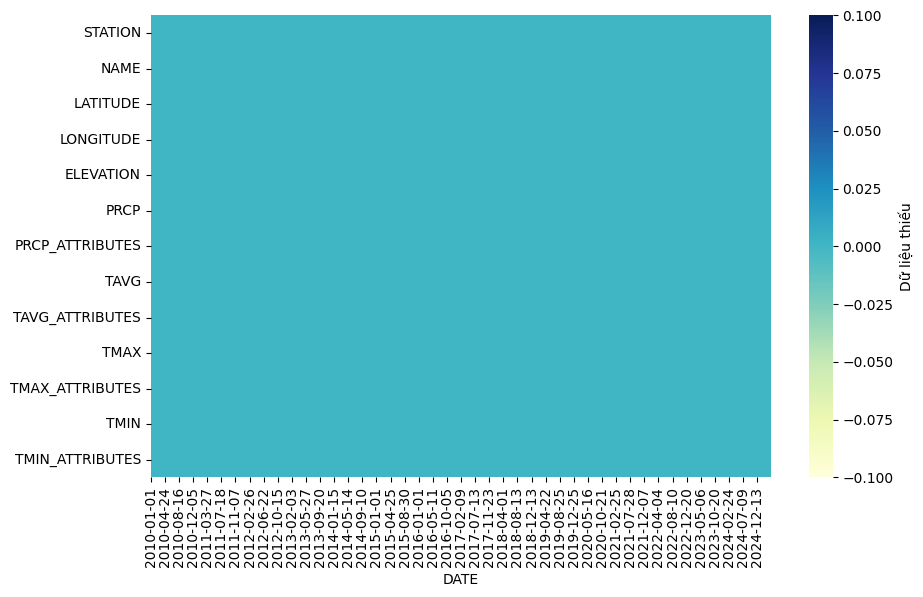

In [271]:
# dùng heatmap để trực quan hóa dữ liệu
plt.figure(figsize=(10,6))
sns.heatmap(weather.isna().transpose(), cmap='YlGnBu',
            cbar_kws={'label': 'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [272]:
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2010-01-01,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",24.9,"H,,S",29.2,",,S",25.2,",,S"
2010-01-02,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.5,",,S",20.7,",,S"
2010-01-03,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.5,",,S",23.1,",,S"
2010-01-04,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.7,",,S",22.6,",,S"
2010-01-05,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.4,"H,,S",29.5,",,S",21.6,",,S"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-13,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.2,"H,,S",27.3,",,S",25.2,",,S"
2025-04-14,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",25.8,"H,,S",30.7,",,S",23.8,",,S"
2025-04-16,VMW00041011,"QUI NHON, VM",13.766667,109.216667,6.1,0.0,",,S",27.0,"H,,S",30.7,",,S",23.0,",,S"


<h1>Khám phá dữ liệu</h1>

In [273]:
core_weather = weather[['PRCP', 'TAVG', 'TMAX', 'TMIN']].copy()

In [274]:
core_weather.columns = ['Rainfall', 'Average Temperature', 'Max Temperature', 'Min Temperature']
core_weather.head(20)

,Rainfall,Average Temperature,Max Temperature,Min Temperature
DATE,,,,
2010-01-01,0.0,24.9,29.2,25.2
2010-01-02,0.0,25.4,29.5,20.7
2010-01-03,0.0,25.4,29.5,23.1
2010-01-04,0.0,25.4,29.7,22.6
2010-01-05,0.0,25.4,29.5,21.6
2010-01-06,0.0,25.6,30.0,21.7
2010-01-07,0.0,25.7,30.0,25.2
2010-01-08,0.0,24.7,28.5,25.2
2010-01-09,12.7,23.8,27.2,21.6


In [275]:
core_weather.dtypes

Rainfall               float64
Average Temperature    float64
Max Temperature        float64
Min Temperature        float64
dtype: object

In [276]:
core_weather.index = pd.to_datetime(core_weather.index, format='%Y-%m-%d')
core_weather.index.year

Index([2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010, 2010,
       ...
       2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025, 2025],
      dtype='int32', name='DATE', length=4880)

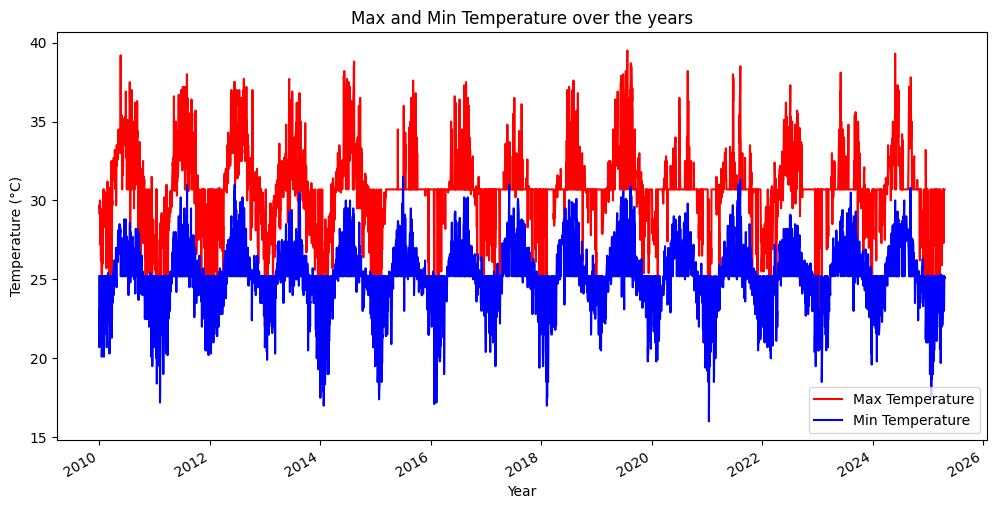

In [277]:
core_weather[['Max Temperature', 'Min Temperature']].plot(figsize=(12, 6), color=['red', 'blue'])
plt.title('Max and Min Temperature over the years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(['Max Temperature', 'Min Temperature'])
plt.savefig('temperature.png', dpi=100)
plt.show()


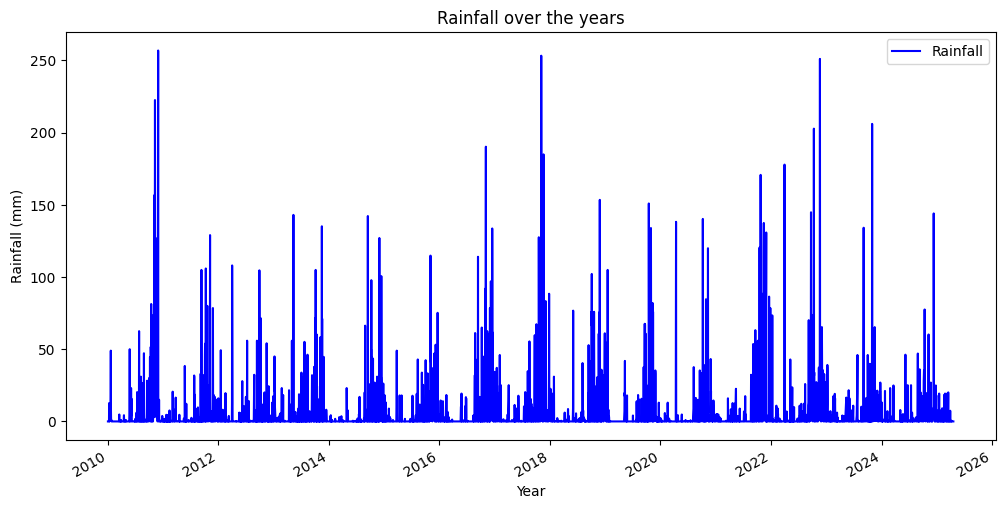

In [278]:
# Xem lượng mưa
core_weather['Rainfall'].plot(figsize=(12, 6), color='blue')
plt.title('Rainfall over the years')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend(['Rainfall'])
plt.savefig('rainfall.png', dpi=100)
plt.show()

In [279]:
# Lượng mưa hàng năm
core_weather.groupby(core_weather.index.year)['Rainfall'].sum()

DATE
2010    2689.9
2011    1465.5
2012    1420.7
2013    1884.2
2014    1491.5
2015    1318.4
2016    2295.9
2017    2315.9
2018    1809.3
2019    1900.1
2020    1268.8
2021    2441.7
2022    2476.4
2023    1880.3
2024    1331.5
2025     199.9
Name: Rainfall, dtype: float64

<h1>Train mô hình Machine Learning</h1>

In [280]:
core_weather["target"] = core_weather.shift(-1)["Max Temperature"]
core_weather

,Rainfall,Average Temperature,Max Temperature,Min Temperature,target
DATE,,,,,
2010-01-01,0.0,24.9,29.2,25.2,29.5
2010-01-02,0.0,25.4,29.5,20.7,29.5
2010-01-03,0.0,25.4,29.5,23.1,29.7
2010-01-04,0.0,25.4,29.7,22.6,29.5
2010-01-05,0.0,25.4,29.5,21.6,30.0
...,...,...,...,...,...
2025-04-13,0.0,25.2,27.3,25.2,30.7
2025-04-14,0.0,25.8,30.7,23.8,30.7
2025-04-16,0.0,27.0,30.7,23.0,30.7


In [281]:
core_weather = core_weather.iloc[: -1, :].copy()
core_weather

,Rainfall,Average Temperature,Max Temperature,Min Temperature,target
DATE,,,,,
2010-01-01,0.0,24.9,29.2,25.2,29.5
2010-01-02,0.0,25.4,29.5,20.7,29.5
2010-01-03,0.0,25.4,29.5,23.1,29.7
2010-01-04,0.0,25.4,29.7,22.6,29.5
2010-01-05,0.0,25.4,29.5,21.6,30.0
...,...,...,...,...,...
2025-04-11,0.0,27.4,30.7,24.7,27.3
2025-04-13,0.0,25.2,27.3,25.2,30.7
2025-04-14,0.0,25.8,30.7,23.8,30.7


In [282]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [283]:
predictors = ['Rainfall', 'Max Temperature', 'Min Temperature']

In [284]:
train = core_weather.loc[:'2022-12-31']
test = core_weather.loc['2023-01-01':]
reg.fit(train[predictors], train['target'])


Ridge(alpha=0.1)

In [285]:
predictions = reg.predict(test[predictors])

<h1>Đánh giá mô hình</h1>

In [286]:
from sklearn.metrics import  mean_absolute_error
mean_absolute_error(test['target'], predictions)

1.14566769512149

In [287]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ['Actual', 'Predicted']
combined


,Actual,Predicted
DATE,,
2023-01-01,26.0,27.464012
2023-01-02,30.7,26.832946
2023-01-03,24.5,30.063335
2023-01-04,24.4,25.869102
2023-01-05,30.7,26.363302
...,...,...
2025-04-11,27.3,30.587439
2025-04-13,30.7,28.355868
2025-04-14,30.7,30.398572


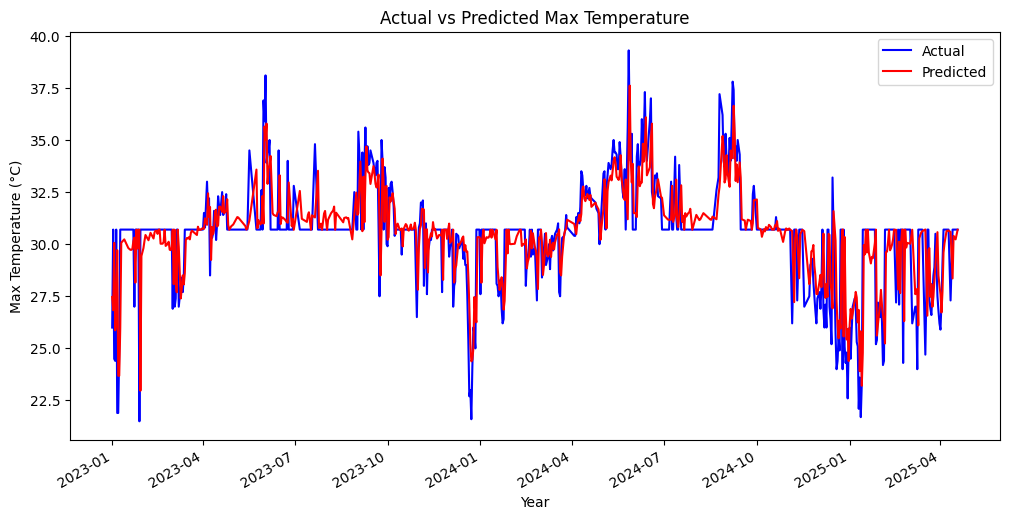

In [288]:
combined.plot(figsize=(12, 6), color=['blue', 'red'])
plt.title('Actual vs Predicted Max Temperature')
plt.xlabel('Year')
plt.ylabel('Max Temperature (°C)')
plt.legend(['Actual', 'Predicted'])
plt.savefig('actual_vs_predicted.png', dpi=100)
plt.show()

In [289]:
reg.coef_

array([6.56919785e-04, 6.87204922e-01, 2.09851680e-01])

<h1>Tạo hàm dự đoán</h1>

In [290]:
def create_predictors(predictors, core_weather, reg):
    train = core_weather.loc[:'2022-12-31']
    test = core_weather.loc['2023-01-01':]
    reg.fit(train[predictors], train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ['Actual', 'Predicted']
    return error, combined


<h1>Tạo thêm nhiều bộ dự đoán</h1>

In [291]:
core_weather["Max Temperature Of Month"] = core_weather["Max Temperature"].rolling(30).mean()
core_weather    

,Rainfall,Average Temperature,Max Temperature,Min Temperature,target,Max Temperature Of Month
DATE,,,,,,
2010-01-01,0.0,24.9,29.2,25.2,29.5,NaN
2010-01-02,0.0,25.4,29.5,20.7,29.5,NaN
2010-01-03,0.0,25.4,29.5,23.1,29.7,NaN
2010-01-04,0.0,25.4,29.7,22.6,29.5,NaN
2010-01-05,0.0,25.4,29.5,21.6,30.0,NaN
...,...,...,...,...,...,...
2025-04-11,0.0,27.4,30.7,24.7,27.3,28.546667
2025-04-13,0.0,25.2,27.3,25.2,30.7,28.583333
2025-04-14,0.0,25.8,30.7,23.8,30.7,28.706667


In [292]:
core_weather["month_day_max"] = core_weather["Max Temperature"] / core_weather["Max Temperature Of Month"]
core_weather["max_min"] = core_weather["Max Temperature"] / core_weather["Min Temperature"]
predictors = ['Rainfall', 'Max Temperature', 'Min Temperature', 'Max Temperature Of Month', 'month_day_max', 'max_min']

In [293]:
core_weather = core_weather.iloc[30:, :].copy()

In [294]:
error, combined = create_predictors(predictors, core_weather, reg)
error

1.2493721093557193